**Tujuan Pembelajaran:**
1. Mengetahui tipe-tipe data dalam pemrograman. (10%)
2. Dapat memahami teori dasar dari model klasifikasi. (20%)
3. Mampu mempersiapkan train data dan test data untuk analisa. (20%)
4. Mampu menganalisa dan mengolah data serta memilih dan menerapkan algoritma data analytics fungsi klasifikasi untuk menyelesaikan permasalahan bisnis. (50%)





Data types atau tipe data adalah sebuah pengklasifikasian data berdasarkan jenis data tersebut. Tipe data dibutuhkan agar kompiler dapat mengetahui bagaimana sebuah data akan digunakan. Untuk mengembangkan sebuah program, ada beberapa tipe data yang akan kita pelajari. Di antaranya adalah Character, String, Array, Numbers dan Booleans.

In [ ]:
# Pada bagian ini mahasiswa diminta untuk melakukan identifikasi tipe data.
harga_kemeja = 90000
print(type(harga_kemeja))

<class 'int'>


Tipe data integer:tipe data numerik yang biasa digunakan apabila bertemu dengan bilangan bulat, seperti 1, 27, 100, dll. Bilangan ini juga mengenal nilai positif dan negatif (signed number). 

In [ ]:
indeks_prestasi = 3,45
print(type(indeks_prestasi))

<class 'tuple'>


Tipe data tuple: salah satu struktur data di Python yang mampu menyimpan sekumpulan nilai dalam satu variabel.

In [ ]:
nilai_big_data = 98.99
print(type(nilai_big_data))

<class 'float'>


Tipe data float: digunakan untuk menandai nilai yang presisi seperti ketelitian tunggal (single precision) dengan menggunakan penyimpanan 32-bit.

In [ ]:
d = "ini adalah kelas Big Data 2021"
print(type(d))

<class 'str'>


Tipe data string: teks yang merupakan gabungan huruf, angka, whitespace (spasi), dan berbagai karakter. 

# **Classification pada German Credit Risk**

Klasifikasi adalah masalah mengidentifikasi dari satu set kategori (sub-populasi) pengamatan baru, atas dasar satu set data pelatihan yang berisi pengamatan (atau contoh) yang keanggotaan kategorinya diketahui. Pada bagian ini, kami akan menggunakan credit risk sebagai studi kasus klasifikasi kami.

"Untuk menghasilkan lebih banyak uang, kita perlu uang". Sebagai individu atau perusahaan ketika Bank ingin meminjamkan uang, Bank menetapkan beberapa parameter atau pedoman penting untuk memahami credit risk. Dalam proyek ini, tujuan kami adalah untuk menganalisis risiko kredit baik dan buruk yang terkait dengan individu. Tujuan dari tahap proyek ini adalah untuk membangun pengklasifikasi yang akan membantu dalam memprediksi apakah seseorang memiliki risiko kredit yang baik atau tidak. Dataset ini berasal dari Data Kredit Jerman, yang bersumber dari Kaggle Repository.

Masing-masing pemohon kredit akan diklasifikasikan ke dalam 2 kategori credit risk yaitu good (1) or bad (0), dengan mempertimbangan parameter berikut :


*   Age (numeric)
*   Sex (text: male, female)
*   Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
*   Housing (text: own, rent, or free)
*   Saving accounts (text - little, moderate, quite rich, rich)
*   Checking account (numeric, in DM - Deutsch Mark)
*   Credit amount (numeric, in DM)
*   Duration (numeric, in month)
*   Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

**Install dan Import Libraries**

Sebelum melanjutkan implementasi classifier, kita harus menginstall serta mengimport library-library Python yang akan dipakai nanti.

***Install Library***


! pip untuk install library ke runtime pythonnya

In [ ]:
# 1. Category Encoders
# Install Category Encoders
! pip install category_encoders

     |████████████████████████████████| 80 kB 5.0 MB/s 


***Import library python yang akan digunakan***


In [ ]:
# Import Library for Data Manipulation
import pandas as pd 
import category_encoders as ce


# Import Library for Machine Learning
import sklearn.metrics as metrics 

# Import Library for Visualization
import matplotlib. pyplot as plt
import seaborn as sns 
import numpy as np; np.random.seed(0) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import Dataset**





***Ambil dan open dataset yang berisi Tabel. Credit_data (new_credit_data.csv).
Cara untuk mengambil data adalah mount drive dulu***

In [ ]:
# Import data local
from google.colab import files
uploaded = files.upload()

Saving new_credit_data.csv to new_credit_data.csv


***Memuat dataset yang akan digunakan menggunakan library pandas dengan
function read_csv (karena file kita extensionnya csv).***

In [ ]:
# open dataframe
df_credit = pd.read_csv('new_credit_data.csv', sep = ';')
# Prints the Dataset Information
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           600 non-null    int64 
 1   sex           600 non-null    object
 2   job           600 non-null    int64 
 3   housing       600 non-null    object
 4   saving        600 non-null    object
 5   checking      600 non-null    object
 6   creditamount  600 non-null    int64 
 7   duration      600 non-null    int64 
 8   purpose       600 non-null    object
 9   risk          600 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 47.0+ KB


***Melihat informasi descriptive statistics***

In [ ]:
# Prints Descriptive Statistics
df_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,600.0,35.241667,11.294359,19.0,27.00,33.0,42.00,74.0
job,600.0,1.913333,0.650534,0.0,2.00,2.0,2.00,3.0
creditamount,600.0,3450.920000,3036.980876,276.0,1369.75,2395.5,4280.25,18424.0
duration,600.0,22.166667,12.536780,4.0,12.00,18.0,28.50,72.0
risk,600.0,0.500000,0.500417,0.0,0.00,0.5,1.00,1.0


**Eksplorasi Data**

> Menampilkan visualisasi dataset



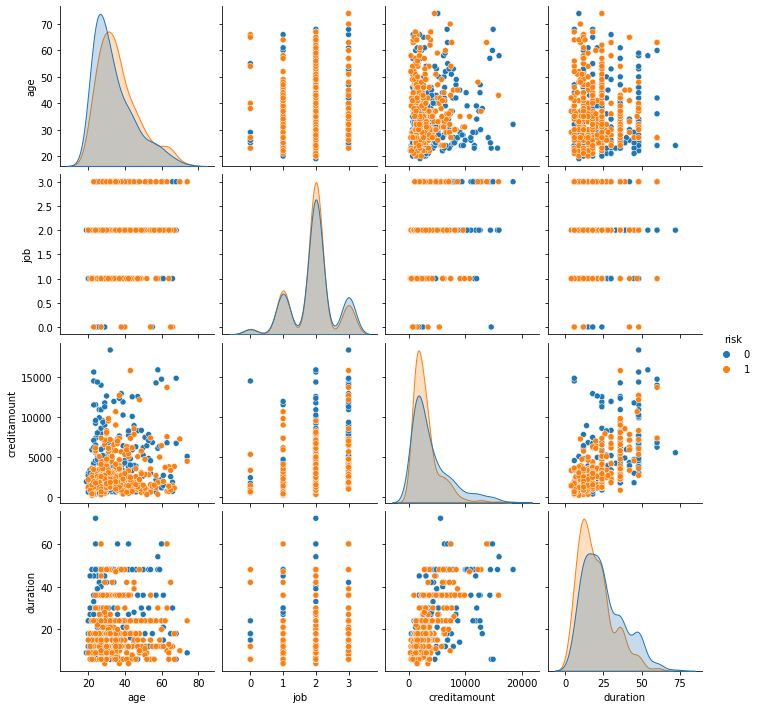

In [ ]:
# Set Graph Size
plt.rcParams['figure.figsize'] = (16, 8)

# Visualize Pair Plot with Colors
sns.pairplot(df_credit, hue='risk')

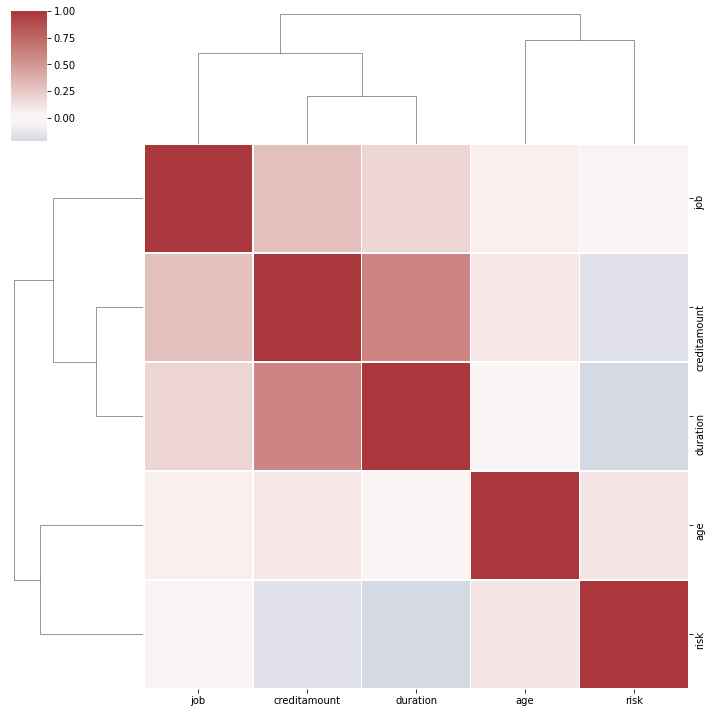

In [ ]:
# Draw Correlation Map
sns.clustermap(df_credit.corr(), center=0, cmap='vlag', linewidths=.75)

Mencari dan menangani missing values. (tahap preprocessing) 

preprocess data

In [ ]:
# Check for Missing Values
df_credit.isnull().sum()

age             0
sex             0
job             0
housing         0
saving          0
checking        0
creditamount    0
duration        0
purpose         0
risk            0
dtype: int64

Import library

In [ ]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

Merubah data menjadi data kategorikal. Encoding merupakan proses konversi
informasi dari suatu sumber(objek) menjadi data. OneHotEncoder digunakan
ketika fiturnya nominal (tidak memiliki urutan apapun), fitur kategorikal akan
membuat variabel baru. Setiap kategori dipetakan dengan variabel biner yang
berisi 0 atau 1. 

In [ ]:
# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_credit2 = pd.DataFrame(encoder.fit_transform(df_credit[['sex',	'housing',	'saving',	'checking', 'purpose']]))
df_credit2.columns = encoder.get_feature_names(['sex'	'housing',	'saving',	'checking', 'purpose'])

# Concat the Encoded Data
df_credit_encoded = df_credit.drop(['sex',	'housing',	'saving',	'checking', 'purpose'] ,axis=1, inplace=True)
df_credit_encoded = pd.concat([df_credit, df_credit2], axis=1)

# Show Encoded Dataframe
df_credit_encoded

,age,job,creditamount,duration,risk,sex_female,sex_male,housing_free,housing_own,housing_rent,saving_little,saving_moderate,saving_quiterich,saving_rich,saving_unknown,checking_little,checking_moderate,checking_rich,checking_unknown,purpose_business,purpose_car,purpose_domesticappliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,38,2,1216,24,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28,2,939,12,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,2,2124,18,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,61,3,1953,36,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,3,7485,30,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,41,1,5954,42,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,27,1,4139,24,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,42,1,1455,4,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
598,40,2,3001,18,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Memilih feature & target. 

In [ ]:
# Select Features
feature = df_credit_encoded.drop(['risk'], axis=1)
feature

,age,job,creditamount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,saving_little,saving_moderate,saving_quiterich,saving_rich,saving_unknown,checking_little,checking_moderate,checking_rich,checking_unknown,purpose_business,purpose_car,purpose_domesticappliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,38,2,1216,24,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28,2,939,12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,2,2124,18,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,61,3,1953,36,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,3,7485,30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,41,1,5954,42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,27,1,4139,24,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,42,1,1455,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
598,40,2,3001,18,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Memilih feature & target. 

In [ ]:
# Select Target
target = df_credit_encoded['risk']
target

0      0
1      0
2      0
3      0
4      0
      ..
595    1
596    1
597    1
598    1
599    1
Name: risk, Length: 600, dtype: int64

Split data menjadi data training dan data testing serta Menampilkan data training dan data testing.

In [ ]:
# Import Module
from sklearn.model_selection import train_test_split, cross_val_score

# Set Training and Testing Data (70:30)
feature_train, feature_test, target_train, target_test = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(420, 26)
(180, 26)
(420,)
(180,)


modelling

#### **Decision Tree Classifier**

***Import library yang akan digunakan untuk modelling***

In [ ]:
# Import library
from sklearn import tree

***Modelling decision tree dan Predict test data.***

In [ ]:
# Modeling Decision Tree
dtree = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtree.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_dtree = dtree.predict(feature_test)
target_predicted_dtree

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0])

***Menampilkan visualisasi dari decision tree***

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


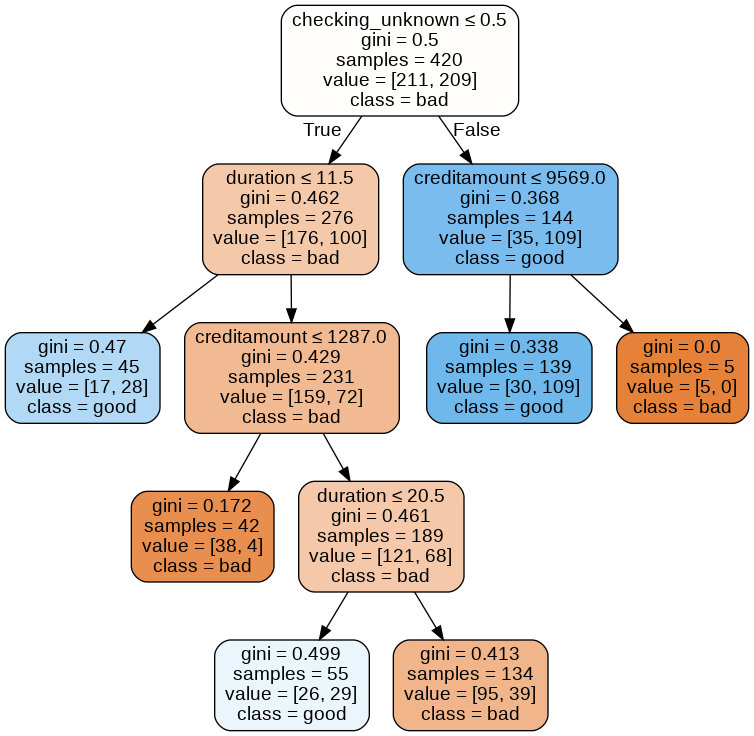

In [ ]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['bad','good'],
                feature_names=['age',	'job',	'creditamount',	'duration',	'sex_female',	'sex_male',	'housing_free',
                        	    'housing_own',	'housing_rent',	'saving_little',	'saving_moderate',	'saving_quiterich',	
                              'saving_rich', 'saving_unknown', 'checking_little',	'checking_moderate',	'checking_rich',
                              'checking_unknown',	'purpose_business',
                              'purpose_car',	'purpose_domesticappliances',	'purpose_education', 'purpose_furniture/equipment',
                              'purpose_radio/TV',	'purpose_repairs',	'purpose_vacation/others'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Evaluasi  Model Decision Tree**

***Confusion Matrix***

In [ ]:
# Confusion Matrix
cm_dtree = metrics.confusion_matrix(target_test, target_predicted_dtree)
cm_dtree

array([[52, 37],
       [22, 69]])

! pip untuk install library ke runtime pythonnya

In [ ]:
!pip install scikit-plot

***Import scikitplot untuk menampilkan visualisasi confusion matrix***

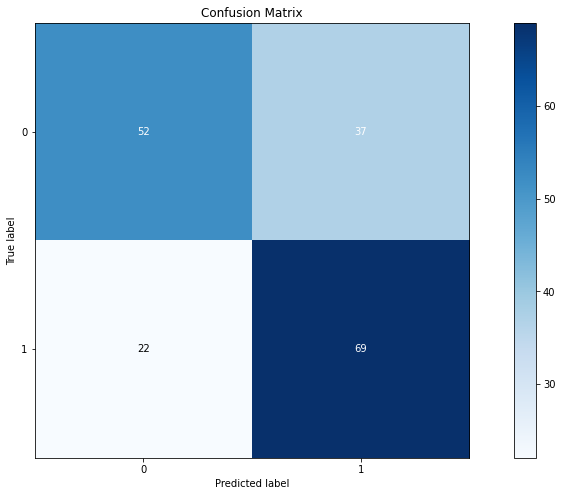

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, target_predicted_dtree)

***Melihat nilai akurasi***

In [ ]:
# Accuracy, Precision, Recall
acc_dtree = metrics.accuracy_score(target_test, target_predicted_dtree)
prec_dtree = metrics.precision_score(target_test, target_predicted_dtree)
rec_dtree = metrics.recall_score(target_test, target_predicted_dtree)
f1_dtree = metrics.f1_score(target_test, target_predicted_dtree)
kappa_dtree = metrics.cohen_kappa_score(target_test, target_predicted_dtree)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_dtree )
print('Precision:', prec_dtree)
print('Recall:', rec_dtree)
print('F1 Score:', f1_dtree)
print('Cohens Kappa Score:', kappa_dtree)

Accuracy: 0.6722222222222223
Precision: 0.6509433962264151
Recall: 0.7582417582417582
F1 Score: 0.7005076142131978
Cohens Kappa Score: 0.3431469569520039


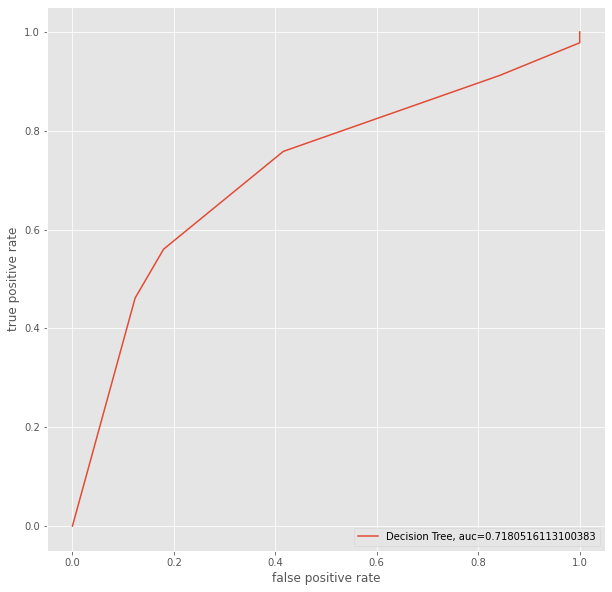

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_dtree_prob = dtree.predict_proba(feature_test)[::,1]
fp_rate_dtree, tp_rate_dtree, _ = metrics.roc_curve(target_test,  target_predicted_dtree_prob)
auc_dtree = metrics.roc_auc_score(target_test, target_predicted_dtree_prob)
plt.plot(fp_rate_dtree, tp_rate_dtree, label='Decision Tree, auc='+str(auc_dtree))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### **KNN**

knn adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat.

Pada tahapan kali ini untuk membuat prediksi KNN menggunakan Scikit-Learn. Tidak ada patokan nilai ideal untuk k, namun pada perhitungan kali ini menggunakan k=71

In [ ]:
# Import Module
from sklearn.neighbors import KNeighborsClassifier

# Modeling KNN
knn = KNeighborsClassifier(n_neighbors= 71)
knn.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_knn = knn.predict(feature_test)
target_predicted_knn

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0])

Hasil array didapatkan dengan memprediksi data feature_test sebanyak 180 data testing. Data – data tersebut dikonversi menjadi biner 0 dan 1.

Membuat model evaluasi  dengan Confusion Matrix. CF dapat menunjukkan data berdasarkan dimensinya seperti gambar dibawah ini

In [ ]:
# Confsion Matrix
cm_knn = metrics.confusion_matrix(target_test, target_predicted_knn)
cm_knn

array([[37, 52],
       [36, 55]])

Scikit-plot adalah paket python yang dapat membantu memvisualisasikan data, model. Scikit-plot adalah upaya sederhana untuk memberikan kesempatan untuk menghasilkan grafik dan plot yang cepat dan indah dengan boilerplate sesedikit mungkin. Hasil dari code diatas sebagai berikut :

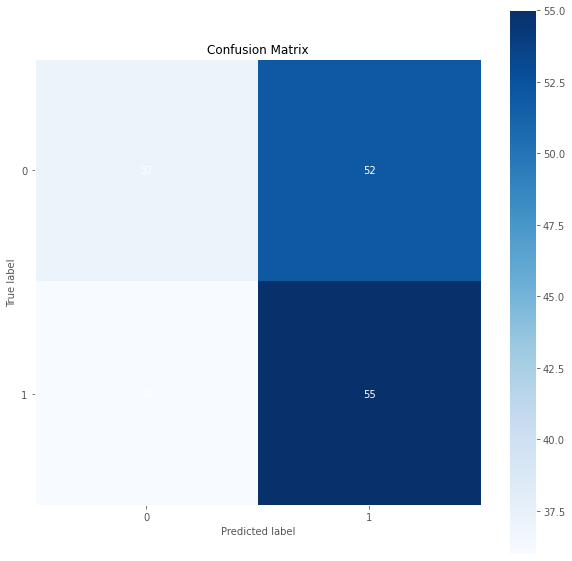

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, target_predicted_knn)

In [ ]:
# Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(target_test, target_predicted_knn)
prec_knn = metrics.precision_score(target_test, target_predicted_knn)
rec_knn = metrics.recall_score(target_test, target_predicted_knn)
f1_knn = metrics.f1_score(target_test, target_predicted_knn)
kappa_knn = metrics.cohen_kappa_score(target_test, target_predicted_knn)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_knn)
print('Precision:', prec_knn)
print('Recall:', rec_knn)
print('F1 Score:', f1_knn)
print('Cohens Kappa Score:', kappa_knn)

Accuracy: 0.5111111111111111
Precision: 0.514018691588785
Recall: 0.6043956043956044
F1 Score: 0.5555555555555555
Cohens Kappa Score: 0.02016578003216629


Code diatas akan menghasilkan nilai :


1.   Accuracy menunjukkan berapa persen orang yang benar diprediksi mendapat 
pinjaman dan tidak mendapatkan pinjaman dari total keseluruhan orang yang mengajukan pinjaman  
Akurasi = (TP + TN ) / (TP+FP+FN+TN)
2.   Precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Menunjukkan berapa persen orang yang mendapatkan pinjaman dari total keseluruhan orang yang mendapatkan pinjaman.
Precission = (TP) / (TP+FP)
3. Recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
Recall = (TP) / (TP + FN)
4. F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan. 
F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
Cohens Kappa Score Fungsi ini menghitung kappa Cohen, skor yang menyatakan tingkat kesepakatan antara dua annotator pada masalah klasifikasi.


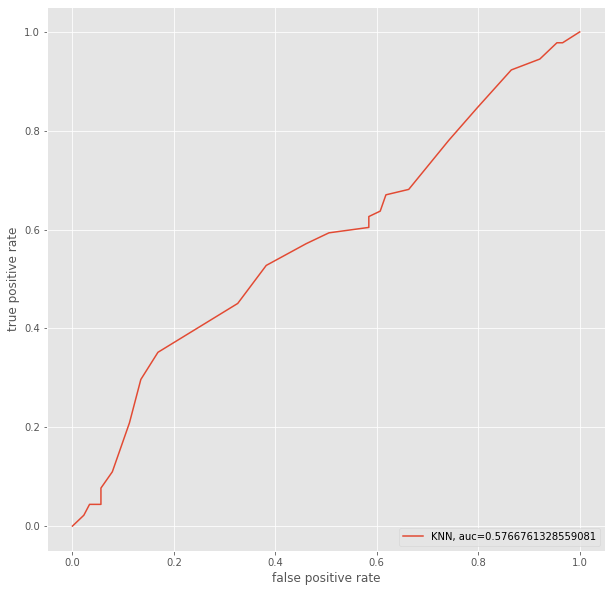

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_knn_prob = knn.predict_proba(feature_test)[::,1]
fp_rate_knn, tp_rate_knn, _ = metrics.roc_curve(target_test,  target_predicted_knn_prob)
auc_knn = metrics.roc_auc_score(target_test, target_predicted_knn_prob)
plt.plot(fp_rate_knn, tp_rate_knn, label='KNN, auc='+str(auc_knn))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

Semakin tinggi True Positive Rate dan semakin kecil False Positive Rate maka thresholdnya semakin bagus. 

##### **Naive Bayes**

Pengklasifikasian Naïve Bayes adalah keluarga dari klasifikasi probabilistik sederhana yang berdasarkan  pada penerapan teorema Bayes dengan asumsi independensi yang kuat antara fitur. Dengan Naive Bayes adalah teknik sederhana untuk membangun klasifikasi dengan model yang menetapkan label kelas ke contoh masalah, direpresentasikan sebagai vektor nilai fitur, di mana label kelas diambil dari beberapa himpunan hingga. Klasifikasi ini bertujuan untuk memecahkan masalah klasifikasi pada kelas tertentu. Dimana pola tersebut dapat digunakan untuk memperkirakan nasabah yang resiko kredit tinggi. Prediksi ini digunakan untuk membantu dalam memprediksi apakah seseorang memiliki risiko kredit yang baik (tinggi) atau tidak(rendah).

***Pembuatan Model Naive Bayes***

Selanjutnya kita akan membuat model naive bayes ini dimulai dari import modul menggunakan Gaussian NB, dimana Gaussian NB digunakan saat cara kerja Naive Bayes untuk fitur berkelanjutan.

In [ ]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes
nb = GaussianNB()
nb.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_nb = nb.predict(feature_test)
target_predicted_nb

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0])

Hasil array didapatkan dengan memprediksi data feature_test dengan mengkonversikan data dalam bentuk biner 0 dan 1.

***Evaluasi Model Naive Bayes***

> Seperti dalam knn, cara evaluasi model dalam naive bayes juga hampir mirip. Confusion matrix dalam model naive bayes menghasilkan array 64, 25, 33 dan 58. Confusion matrix dapat menunjukkan data berdasarkan dimensinya seperti gambar dibawah ini.


In [ ]:
# Confusion Matrix
cm_nb = metrics.confusion_matrix(target_test, target_predicted_nb)
cm_nb

array([[64, 25],
       [33, 58]])

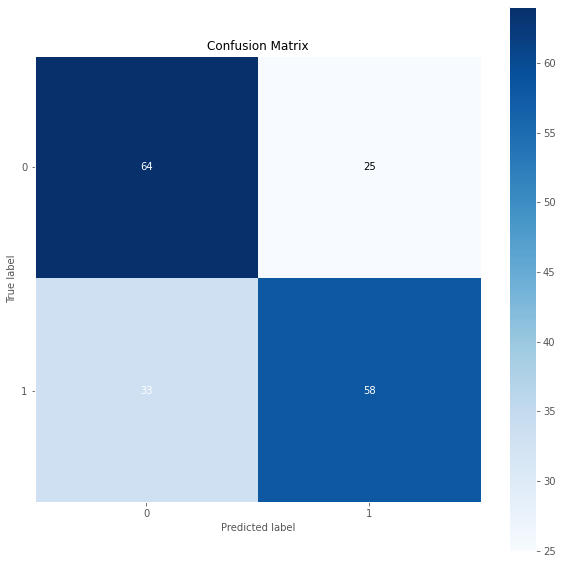

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test, target_predicted_nb)

scikit plot digunakan untuk menampilkan confusion matrix. di dalam confusion matrix memiliki 2 variabel, yaitu true class dan predicted class. Dimana true berarti kenyataan dan prediksi memiliki hasilnya sama entah false-false atau true-true, sedangkan predicted class berarti hasil prediksi berbeda dengan kenyataan.

In [ ]:
# Accuracy, Precision, Recall
acc_nb = metrics.accuracy_score(target_test, target_predicted_nb)
prec_nb = metrics.precision_score(target_test, target_predicted_nb)
rec_nb = metrics.recall_score(target_test, target_predicted_nb)
f1_nb = metrics.f1_score(target_test, target_predicted_nb)
kappa_nb = metrics.cohen_kappa_score(target_test, target_predicted_nb)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_nb)
print('Precision:', prec_nb)
print('Recall:', rec_nb)
print('F1 Score:', f1_nb)
print('Cohens Kappa Score:', kappa_nb)

Accuracy: 0.6777777777777778
Precision: 0.6987951807228916
Recall: 0.6373626373626373
F1 Score: 0.6666666666666666
Cohens Kappa Score: 0.35611200197360304


Dari model naive bayes menampilkan accuracy, precision, recall, f1 score dan cohen's kappa score. Code diatas akan menghasilkan nilai :


1.   Accuracy menunjukkan berapa persen orang yang benar diprediksi mendapat 
pinjaman dan tidak mendapatkan pinjaman dari total keseluruhan orang yang mengajukan pinjaman  
Akurasi = (TP + TN ) / (TP+FP+FN+TN)
2.   Precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Menunjukkan berapa persen orang yang mendapatkan pinjaman dari total keseluruhan orang yang mendapatkan pinjaman.
Precission = (TP) / (TP+FP)
3. Recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
Recall = (TP) / (TP + FN)
4. F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan. 
F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
Cohens Kappa Score Fungsi ini menghitung kappa Cohen, skor yang menyatakan tingkat kesepakatan antara dua annotator pada masalah klasifikasi.



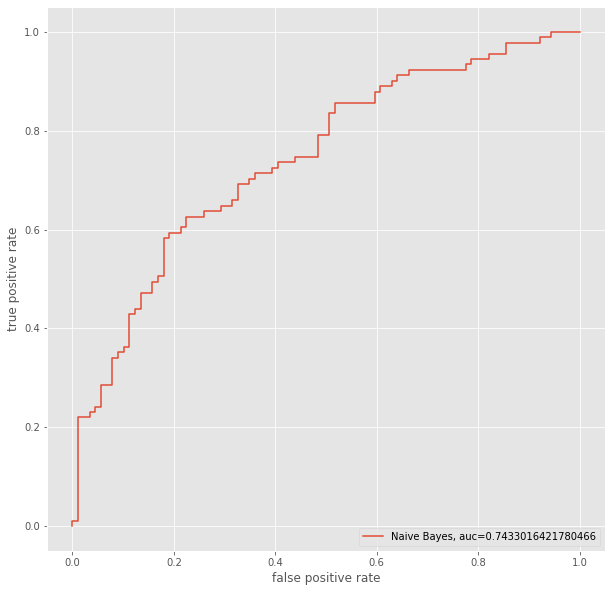

In [ ]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_nb_prob = nb.predict_proba(feature_test)[::,1]
fp_rate_nb, tp_rate_nb, _ = metrics.roc_curve(target_test,  target_predicted_nb_prob)
auc_nb = metrics.roc_auc_score(target_test, target_predicted_nb_prob)
plt.plot(fp_rate_nb, tp_rate_nb, label='Naive Bayes, auc='+str(auc_nb))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

**Evaluasi Model**

***Membandingkan Model Performansi***
>Dengan membandingkan performansi antara model decision tree, knn dan naive bayes. Untuk melakukan perbandingan kita menggunakan fungsi print untuk accuracy, precision, recall and F1- Score. 

In [ ]:
# Comparing Model Performance
print('Decision Tree Accuracy =',acc_dtree)
print('Decision Tree Precision =',prec_dtree)
print('Decision Tree Recall =',rec_dtree)
print('Decision Tree F1-Score =', f1_dtree)
print('_______________________')
print('k-NN Accuracy =', acc_knn)
print('k-NN Precision =', prec_knn)
print('k-NN Recall =', rec_knn)
print('k-NN F1-Score =', f1_knn)
print('_______________________')
print('Naive Bayes Accuracy =', acc_nb)
print('Naive Bayes Precision =', prec_nb)
print('Naive Bayes Recall =', rec_nb)
print('Naive Bayes F1-Score =', f1_nb)

Decision Tree Accuracy = 0.6722222222222223
Decision Tree Precision = 0.6509433962264151
Decision Tree Recall = 0.7582417582417582
Decision Tree F1-Score = 0.7005076142131978
_______________________
k-NN Accuracy = 0.5111111111111111
k-NN Precision = 0.514018691588785
k-NN Recall = 0.6043956043956044
k-NN F1-Score = 0.5555555555555555
_______________________
Naive Bayes Accuracy = 0.6777777777777778
Naive Bayes Precision = 0.6987951807228916
Naive Bayes Recall = 0.6373626373626373
Naive Bayes F1-Score = 0.6666666666666666


***Membandingkan ROC Curve***

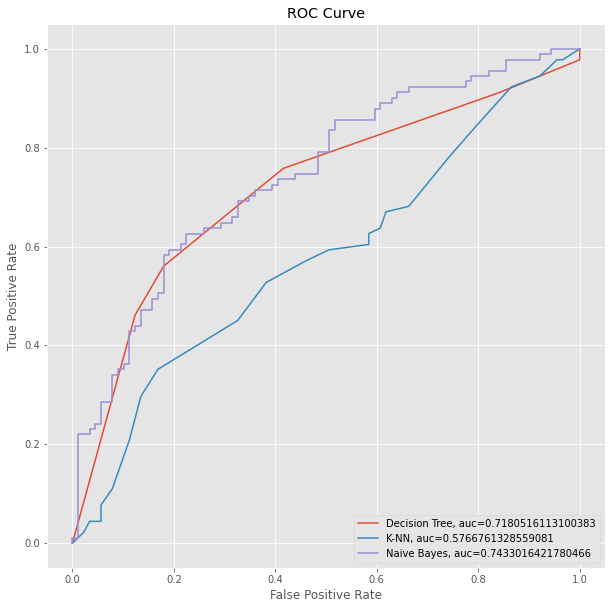

In [ ]:
# Comparing ROC Curve
plt.plot(fp_rate_dtree,tp_rate_dtree,label='Decision Tree, auc='+str(auc_dtree))
plt.plot(fp_rate_knn,tp_rate_knn,label='K-NN, auc='+str(auc_knn))
plt.plot(fp_rate_nb,tp_rate_nb,label='Naive Bayes, auc='+str(auc_nb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()